# Red wine quality

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()  #for statistical summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


key observations:
    1) The Mean is more than the Median (50%) in all the columns.
    2) There is a large difference in 75%and max in residual sugar, free sulphur dioxide, and total sulphur dioxide.
    3) The 1 and 2 observations suggest that there are extreme outliers present in these three columns.

Exploring the data variable

In [9]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Target/dependent variable is dicrete and categorical in nature.


quality score scale ranges from 3 to 8;


where 3 is low quality and 8 is best.


only scores obtained are between 3 to 8.


In [10]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

observations:
    
    quality has most values concentrated in the categories of 5, 6, 7
    
    few observations are present in the categories of 3 and 8

# Data Visualizations

To check the missing values

<AxesSubplot:>

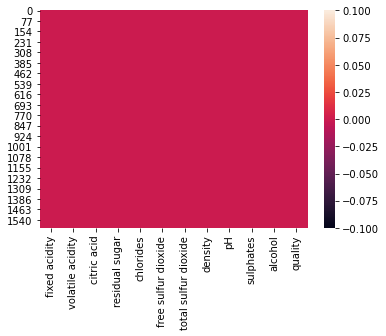

In [11]:
sns.heatmap(df.isnull())

observations:
    1. There are no missing value in this dataset; if there were any, you would not have noticed in the plot shown by different color shades.
    

# To check the Correlation

In [12]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

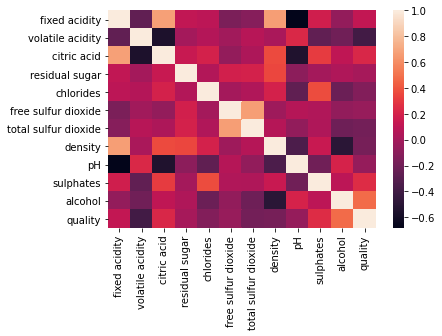

In [13]:
sns.heatmap(dfcor)

observations:
    1. It shows multicolinearity among different columns.
    
    2. free sulphur dioxide and total sulphur dioxide has highset positive correlation.
    
    3. volatile acidity and citric acid are negatively correlated to each other.
    
    4. quality  is the dependent variable which is more likely depend upon alcohol(+ve) i.e. highly correlatedc with alcohol , then some upon sulphate and moderate dependency upon othervariables.
   
   5. whereas, quality negatively depend upon the volatile acidity with darkest shade, hence we can drop this from the data set for linear regression.

##To plot the numericals values from the table

In [14]:
plt.figure(figsize=(6,7))  # for the size of the graph

<Figure size 432x504 with 0 Axes>

<Figure size 432x504 with 0 Axes>

<AxesSubplot:>

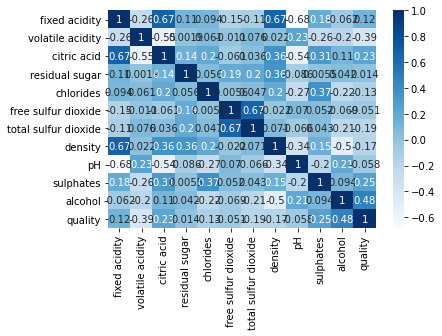

In [15]:
sns.heatmap(dfcor,cmap='Blues',annot=True)     #cmap=color of the graph

In [16]:
#sns.heatmap? #observations same as above

# Plotting Outliers

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

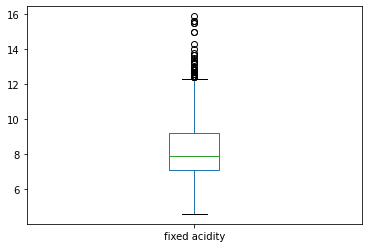

In [18]:
#Univariate analysis (single variable at a time)

df['fixed acidity'].plot.box()

In [19]:
df.shape

(1599, 12)

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

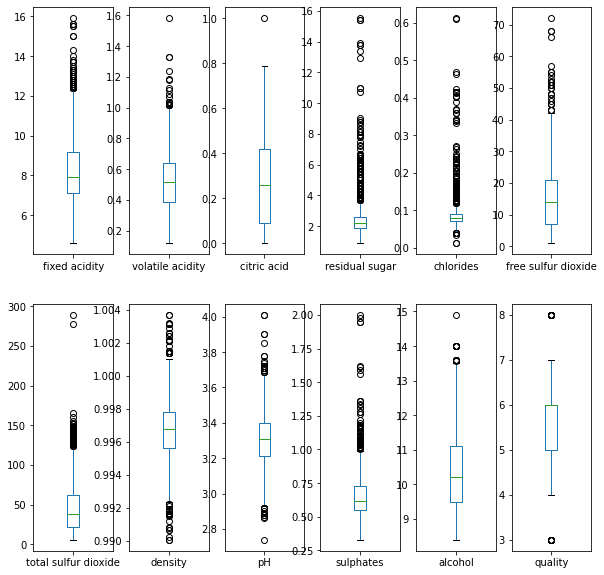

In [20]:
df.plot(kind ='box',subplots=True,layout=(2,6),figsize=(10,10))

Observations:
    There are many outliers in all the columns that we should remove in next step.

# To Check the distribution of skewness

In [21]:
#By unvariate analysis

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

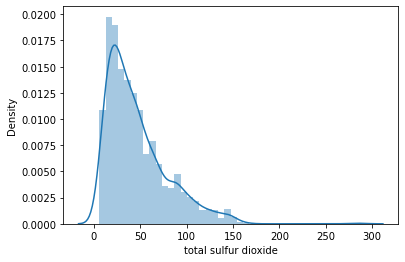

In [22]:
sns.distplot(df['total sulfur dioxide'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

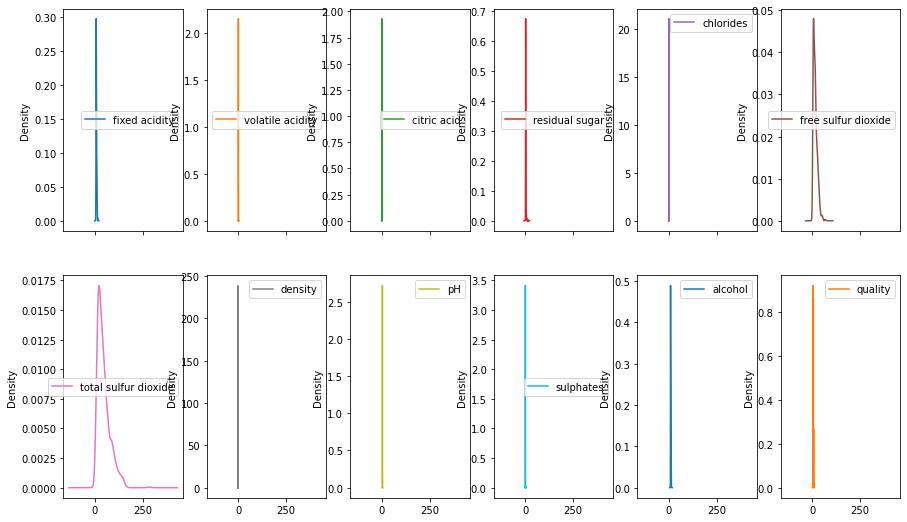

In [23]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,9))

observation, shows total sulfur and free sulfur dioxide has some skewnes.

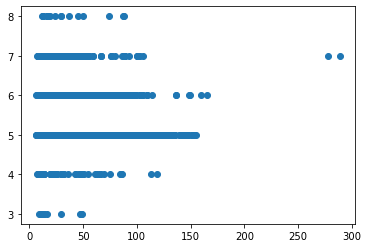

In [24]:
#bivariate analysis

plt.scatter(df['total sulfur dioxide'],df['quality'])

In [25]:
#sns.pairplot(df)

This show different linear regression and correlation between different variables

# Drop the column

#drop the most negative variable which has least impact on the output or target variable; in this case 'volatile acidity' is the most negative variable.

In [26]:
df.drop('volatile acidity',axis=1,inplace=True)

In [27]:
df.head(10)

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [28]:
df.shape

(1599, 11)

# Removing Outliers

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 1.39147228, 0.45321841, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.39147228, 0.04341614, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.18607043, 0.16942723, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.72391627, 0.16942723, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.77526673, 0.38227061, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.02199944, 0.75289408, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [30]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
        291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
        396,  400,  400,  442,  442,  451,  459,  467,  480,  480,  494,
        515,  517,  544,  554,  554,  555,  555,  557,  557,  568,  584,
        588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
        652,  652,  672,  684,  690,  692,  692,  695,  723,  730,  754,
        776,  777,  795,  821,  832,  836,  837,  889,  899,  911,  917,
        923,  925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074,
       1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186,
       1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288,
       1289, 1295, 1296, 1299, 1300, 1316, 1319, 1

In [31]:
#removing the values beyond 3
z[155][10]

0.787822640922809

In [32]:
z[1589][10]

0.787822640922809

In [33]:
z[12][9]

0.49090986207595044

In [34]:
#give dataframe a new name which has no outliers

newdf=df[(z<3).all(axis=1)]

newdf

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
newdf.shape

(1458, 11)

141 rows are deleted as an outliers

In [36]:
df=newdf
df.shape

(1458, 11)

# Percentage of Data Loss

In [37]:
loss_percent=(1599-1458 )/1458 *100
print(loss_percent)

9.670781893004115


It shows there are 9% outliers in the dataset.

# Dividing the Data in Features and vectors (Indexing--->to select rows and col)

In [38]:
x=df.iloc[:,:-1]

In [39]:
y=df.iloc[:,-1]

In [40]:
x.shape

(1458, 10)

In [41]:
y.shape

(1458,)

In [42]:
x.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [43]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

# Transforming Data To Remove Skewness

In [44]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.46531304, -1.52179499, -0.60699518, ...,  1.35472616,
        -0.58214208, -1.12084644],
       [-0.16806727, -1.52179499,  0.65224299, ..., -0.82077427,
         0.45668225, -0.53203934],
       [-0.16806727, -1.24125263,  0.21101302, ..., -0.38617329,
         0.22572251, -0.53203934],
       ...,
       [-1.44922717, -0.66001353,  0.21101302, ...,  0.74054165,
         0.93435865,  0.74129668],
       [-1.88412706, -0.72146733, -0.37111918, ...,  1.7567213 ,
         0.67127261, -0.03633508],
       [-1.77077959,  1.07540664,  1.5464447 , ...,  0.5327437 ,
         0.30462192,  0.74129668]])

In [45]:
#Power Tranform Method helps to treat both positive and negative values in the dataset.

#This gives array in 2-D form.


# Sclaing The Data

In [46]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.46531304, -1.52179499, -0.60699518, ...,  1.35472616,
        -0.58214208, -1.12084644],
       [-0.16806727, -1.52179499,  0.65224299, ..., -0.82077427,
         0.45668225, -0.53203934],
       [-0.16806727, -1.24125263,  0.21101302, ..., -0.38617329,
         0.22572251, -0.53203934],
       ...,
       [-1.44922717, -0.66001353,  0.21101302, ...,  0.74054165,
         0.93435865,  0.74129668],
       [-1.88412706, -0.72146733, -0.37111918, ...,  1.7567213 ,
         0.67127261, -0.03633508],
       [-1.77077959,  1.07540664,  1.5464447 , ...,  0.5327437 ,
         0.30462192,  0.74129668]])

In [47]:
#Since the outcome  has only 2 variable we willuse Binary Classification Model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [49]:
# It will helps in solving the problem of under and over fitting of the dataset.

# Splitting The DataFrame

In [50]:
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(accuracy_score(ytrain,pred_train)*100,1)==round(accuracy_score(ytest,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random_state:-',i)
        print('Training r2_score is:-',accuracy_score(ytrain,pred_train)*100)
        print('Testing r2_score is:-',accuracy_score(ytest,pred_test)*100)

At random state 468 The model performs very well
At random_state:- 468
Training r2_score is:- 60.97770154373928
Testing r2_score is:- 60.95890410958904
At random state 528 The model performs very well
At random_state:- 528
Training r2_score is:- 59.86277873070326
Testing r2_score is:- 59.93150684931506
At random state 806 The model performs very well
At random_state:- 806
Training r2_score is:- 59.86277873070326
Testing r2_score is:- 59.93150684931506


In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=899)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.36      0.40      0.38       115
           6       0.39      0.48      0.43       115
           7       0.24      0.11      0.15        45
           8       0.00      0.00      0.00         7

    accuracy                           0.36       292
   macro avg       0.20      0.20      0.19       292
weighted avg       0.33      0.36      0.34       292



In [53]:
#this gives training accuracy is almost equal to testing accuracy.

# Cross Validation Score for Logistic Regression

In [54]:
pred_lr=lr.predict(xtest)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(ytest,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv:-',j)
    print('cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 2
cross validation score is:- 54.59533607681757
accuracy_score is:- 56.16438356164384


At cv:- 3
cross validation score is:- 58.230452674897116
accuracy_score is:- 56.16438356164384


At cv:- 4
cross validation score is:- 58.3012193286166
accuracy_score is:- 56.16438356164384


At cv:- 5
cross validation score is:- 58.09301887680648
accuracy_score is:- 56.16438356164384


At cv:- 6
cross validation score is:- 59.39643347050754
accuracy_score is:- 56.16438356164384


At cv:- 7
cross validation score is:- 58.713654766286346
accuracy_score is:- 56.16438356164384


At cv:- 8
cross validation score is:- 58.646339998799014
accuracy_score is:- 56.16438356164384


At cv:- 9
cross validation score is:- 58.0246913580247
accuracy_score is:- 56.16438356164384




In [55]:
#since Cross validation and accuracy score is almost same . we are  heading with a good approach.

In [56]:
lsscore_selected=cross_val_score(lr,x,y,cv=4).mean()
print('The cv score is:-',lsscore_selected,'\nThe accuracy score is:-',lss)

The cv score is:- 0.5830121932861659 
The accuracy score is:- 0.5616438356164384


# AUC ROC Curve

In [57]:
from sklearn.metrics import roc_curve,auc

In [58]:
fpr,tpr,thresholds=roc_curve(ytest, pred_test, pos_label=8)

In [59]:
#fpr,tpr,thresholds=roc_curve(ytest,pred_test)

roc_auc=auc(fpr,tpr)

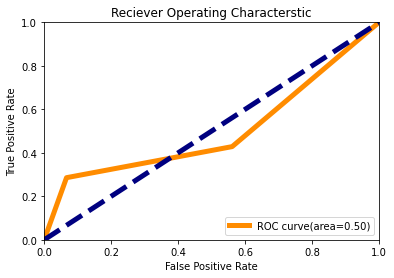

In [60]:
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',lw=5, label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=5,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstic')
plt.legend(loc='lower right')
plt.show()

# Model Saving

In [62]:
import pickel
filename='quality.pkl'
pickel.dump(lr,open(filename,'wb'))

ModuleNotFoundError: No module named 'pickel'

# Conclusion

In [63]:
a=np.array(ytest)
predicted=np.array(lr.predict(xtest))
df_qual=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))

In [64]:
df_qual

,original,predicted
0,6,5
1,7,6
2,5,5
3,6,5
4,6,6
...,...,...
287,7,6
288,6,6
289,6,5
290,6,7


This shows many errors in my outcome